# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 



In [2]:
from Tools.tools import rec
from Tools.tools import collection
import sounddevice as sd 

### Collection 

In [3]:
#collection()




In [4]:
import sounddevice as sd
data = sd.rec(int(2 * 48000), samplerate=48000, channels=1)

#### 1. Importer votre DataSet

In [5]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [6]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,18.326599,-18.087076,-2.519763,-1.411222,3.542710,-4.045741,2.368929,-0.893494,-4.920676,-5.868312,-5.048403,-6.177556,0.0
1,17.076900,-22.033729,1.165585,-6.879923,-1.419176,-6.638669,0.877433,-0.992864,-4.704519,-4.218958,-4.882876,-4.968513,1.0
2,17.642493,-17.895881,0.072153,-1.839664,2.358295,-4.583053,3.595768,0.675350,-4.374665,-4.304957,-4.289187,-6.346464,2.0
3,9.888533,-29.989550,-1.378927,-8.834919,-4.355457,-9.027215,-1.202925,-0.686970,-0.610381,-0.459457,-1.033280,-2.281549,3.0
4,10.033289,-16.052064,-1.114307,-6.134252,-0.839433,-6.031453,2.296254,-0.680426,-4.195403,-3.579312,-4.057888,-5.172537,4.0


In [7]:
mydata


,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,18.326599,-18.087076,-2.519763,-1.411222,3.542710,-4.045741,2.368929,-0.893494,-4.920676,-5.868312,-5.048403,-6.177556,0.0
1,17.076900,-22.033729,1.165585,-6.879923,-1.419176,-6.638669,0.877433,-0.992864,-4.704519,-4.218958,-4.882876,-4.968513,1.0
2,17.642493,-17.895881,0.072153,-1.839664,2.358295,-4.583053,3.595768,0.675350,-4.374665,-4.304957,-4.289187,-6.346464,2.0
3,9.888533,-29.989550,-1.378927,-8.834919,-4.355457,-9.027215,-1.202925,-0.686970,-0.610381,-0.459457,-1.033280,-2.281549,3.0
4,10.033289,-16.052064,-1.114307,-6.134252,-0.839433,-6.031453,2.296254,-0.680426,-4.195403,-3.579312,-4.057888,-5.172537,4.0
5,10.260528,-32.059790,-2.959913,-8.155602,-2.867486,-6.849039,1.429263,-0.357575,-2.323648,-1.549099,-0.857422,-1.800762,5.0
6,17.872650,-20.505477,-2.981577,-2.918648,1.219452,-5.231662,4.077899,-1.450982,-5.371238,-4.406147,-5.111460,-5.926401,6.0
7,11.341697,-31.497114,-2.281962,-7.420822,-2.349310,-7.166776,1.038858,-0.528205,-3.470312,-3.615940,-2.936024,-2.730139,7.0
8,16.514362,-31.653119,-0.969074,-6.464126,-1.955424,-7.143034,0.213895,-0.907910,-3.300716,-3.729634,-3.865466,-3.593271,8.0
9,17.354554,-22.508704,0.920515,-4.781732,0.932793,-4.192028,3.257939,-0.922527,-5.040517,-3.828130,-5.317109,-5.020233,9.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [8]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     50 non-null     float64
 1   Fe2     50 non-null     float64
 2   Fe3     50 non-null     float64
 3   Fe4     50 non-null     float64
 4   Fe5     50 non-null     float64
 5   Fe6     50 non-null     float64
 6   Fe7     50 non-null     float64
 7   Fe8     50 non-null     float64
 8   Fe9     50 non-null     float64
 9   Fe10    50 non-null     float64
 10  Fe11    50 non-null     float64
 11  Fe12    50 non-null     float64
 12  Target  50 non-null     float64
dtypes: float64(13)
memory usage: 5.2 KB


In [9]:
mydata.isnull().sum()

Fe1       0
Fe2       0
Fe3       0
Fe4       0
Fe5       0
Fe6       0
Fe7       0
Fe8       0
Fe9       0
Fe10      0
Fe11      0
Fe12      0
Target    0
dtype: int64

In [10]:
mydata.shape

(50, 13)

In [11]:
mydata.columns

Index(['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12', 'Target'],
      dtype='object')

In [12]:
mydata.select_dtypes(include=object)


""
0
1
2
3
4
5
6
7
8
9


In [13]:
mydata['Target']

0     0.0
1     1.0
2     2.0
3     3.0
4     4.0
5     5.0
6     6.0
7     7.0
8     8.0
9     9.0
10    0.0
11    1.0
12    2.0
13    3.0
14    4.0
15    5.0
16    6.0
17    7.0
18    8.0
19    9.0
20    0.0
21    1.0
22    2.0
23    3.0
24    4.0
25    5.0
26    6.0
27    7.0
28    8.0
29    9.0
30    0.0
31    1.0
32    2.0
33    3.0
34    4.0
35    5.0
36    6.0
37    7.0
38    8.0
39    9.0
40    0.0
41    1.0
42    2.0
43    3.0
44    4.0
45    5.0
46    6.0
47    7.0
48    8.0
49    9.0
Name: Target, dtype: float64

In [14]:
mydata['Target'].value_counts()

0.0    5
1.0    5
2.0    5
3.0    5
4.0    5
5.0    5
6.0    5
7.0    5
8.0    5
9.0    5
Name: Target, dtype: int64

In [15]:
mydata['Target'].nunique()

10

In [16]:
mydata['Target'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### 3. Visualiser les targets

<AxesSubplot:>

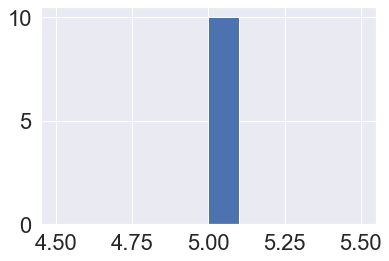

In [17]:
mydata['Target'].value_counts().hist()

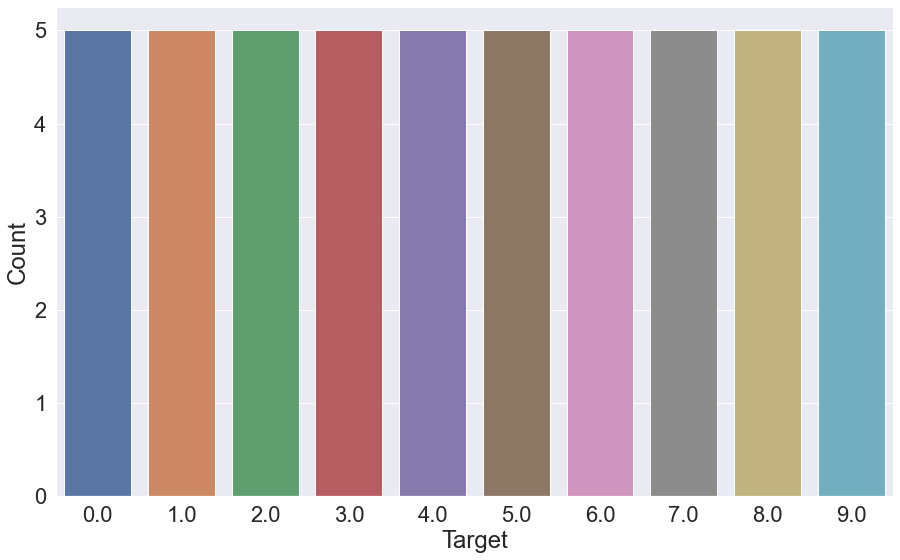

In [18]:
plt.figure(1,figsize=(15,9))
sb.countplot(x='Target', data=mydata)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [19]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(50, 12)

In [20]:
#avec isin
#y = mydata[mydata['Target'].isin([1, 3, 5, 9, 7])]


#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (40, 12) Test: (10, 12)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [23]:
from sklearn.preprocessing import StandardScaler



#### 7. Développer votre meilleur modèle de classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

models = [('svc', SVC(),[{'kernel': ['linear', 'rbf'],'C':[1, 10]}]), 
          ('knn', KNeighborsClassifier(), [{'n_neighbors': np.arange(1, 20), 'metric':["euclidean", "minkowski", "manhattan"]}]), 
          ('decision_tree', DecisionTreeClassifier(), [{}]), 
          ('random_forest', RandomForestClassifier(), [{'n_estimators': np.arange(100, 150)}])]
score = []
best_param = []
for model in models:
        exp = GridSearchCV(model[1], param_grid = model[2], cv=3)
        exp.fit(X_train, y_train)
        score.append([model[0], exp.score(X_test, y_test), exp.best_params_])
print(score)

[['svc', 0.3, {'C': 1, 'kernel': 'linear'}], ['knn', 0.5, {'metric': 'manhattan', 'n_neighbors': 2}], ['decision_tree', 0.1, {}], ['random_forest', 0.4, {'n_estimators': 106}]]


In [25]:
#tester sans certitude
#from sklearn.ensemble import RandomForestClassifier

In [26]:
# from sklearn.feature_selection import VarianceThreshold

In [27]:
#lamine

In [28]:
#pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

# Application en Temps Réel

In [29]:
import sounddevice as sd  # sinon pip install sounddevice
import time  # sinon pip install python-time
import scipy.io.wavfile as wav
# sinon pip install python_speech_features==0.4
from python_speech_features import mfcc
import wave
import os
import numpy as np
import pandas as pd
def rec2(classifier):

    print("Attention, l'enregistrement commence dans :")
    for i in range(0, 6):
        time.sleep(1)
        print(5-i)

    time.sleep(1)

    rate = 48000
    duration = 2

    print("Prononcer votre Digit : ")
    data = sd.rec(int(duration * rate), samplerate=rate, channels=1)
    sd.wait()

    data = data / data.max() * np.iinfo(np.int16).max
    data = data.astype(np.int16)

    mfcc_feat = np.mean(mfcc(data, rate, numcep=12), axis=0)
    mfcc_feat = np.expand_dims(mfcc_feat, axis=0)
    pred = classifier.predict(mfcc_feat)
    print('------------------')
    print('Digit : ', pred[0])
    print('------------------')

In [30]:
model = SVC(C= 1, kernel= 'rbf')
model.fit(X_train, y_train)

rec2(model)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 


------------------
Digit :  5.0
------------------


In [31]:
import joblib

filename = 'Digits_Recognition_Brief'

joblib.dump(model, filename)

#nom_du_modele = joblib.load(filename)

['Digits_Recognition_Brief']